In [1]:
from dataloader import val_dataset

/home/spaaceship/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/spaaceship/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/spaaceship/.local/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
sample = val_dataset[3]
img_A = sample["img_A"]
img_B = sample["img_B"]
label = sample["label"]

print(img_A.shape, img_B.shape, label.shape)
print(img_A[0].shape)

torch.Size([3, 256, 256]) torch.Size([3, 256, 256]) torch.Size([1, 256, 256])
torch.Size([256, 256])


In [3]:
from encoder import Encoder

In [4]:
model1_enc = Encoder("fccdn")

In [5]:
y1, y2 = model1_enc(img_A.reshape((1,3,256,256)), img_B.reshape((1,3,256,256)))

In [6]:
y1.shape, y2.shape

(torch.Size([65536]), torch.Size([65536]))

In [7]:
y1 = y1.detach().numpy()
y2 = y2.detach().numpy()

In [8]:
import pandas as pd
import numpy as np

In [9]:
df_describe = pd.DataFrame(y1)
df_describe.describe()

,0
count,65536.000000
mean,1.162205
std,0.775923
min,0.000000
25%,0.586776
50%,1.081754
75%,1.633634
max,6.434435


array([[<Axes: title={'center': '0'}>]], dtype=object)

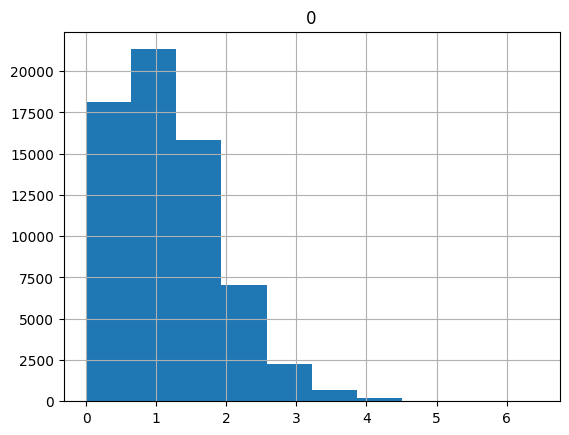

In [10]:
df_describe.hist()

In [11]:
import pickle

In [12]:
def read_list(filename):
    # for reading also binary mode is important
    with open(filename, 'rb') as fp:
        n_list = pickle.load(fp)
        return n_list

In [20]:
blue_data = read_list("./data/a2net/a2net-blue_data.txt")
green_data = read_list("./data/a2net/a2net-green_data.txt")
red_data = read_list("./data/a2net/a2net-red_data.txt")
yellow_data = read_list("./data/a2net/a2net-yellow_data.txt")

In [21]:
blue_df = pd.DataFrame(blue_data)
green_df = pd.DataFrame(green_data)
red_df = pd.DataFrame(red_data)
yellow_df = pd.DataFrame(yellow_data)

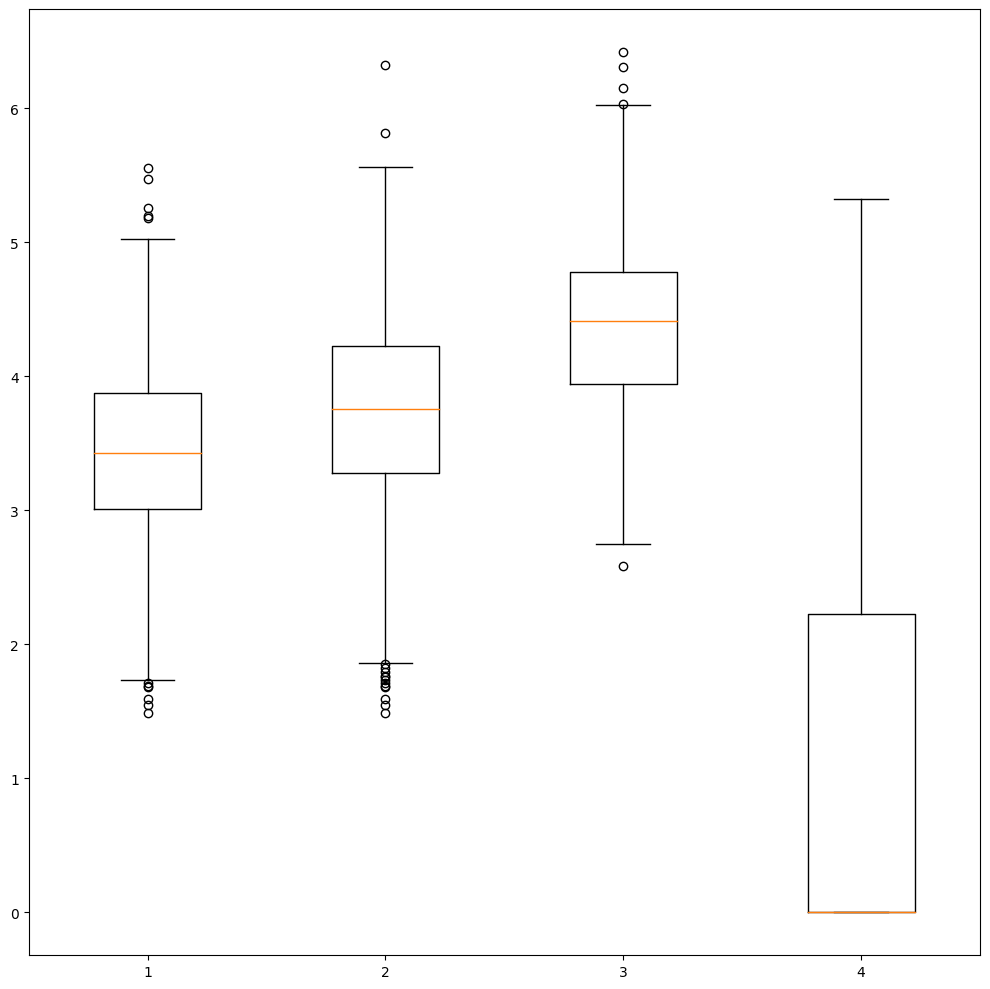

In [41]:
# Set the figure size
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
plt.boxplot([
    green_data,
    blue_data,
    red_data,
    yellow_data
])

# Display the plot
plt.show()

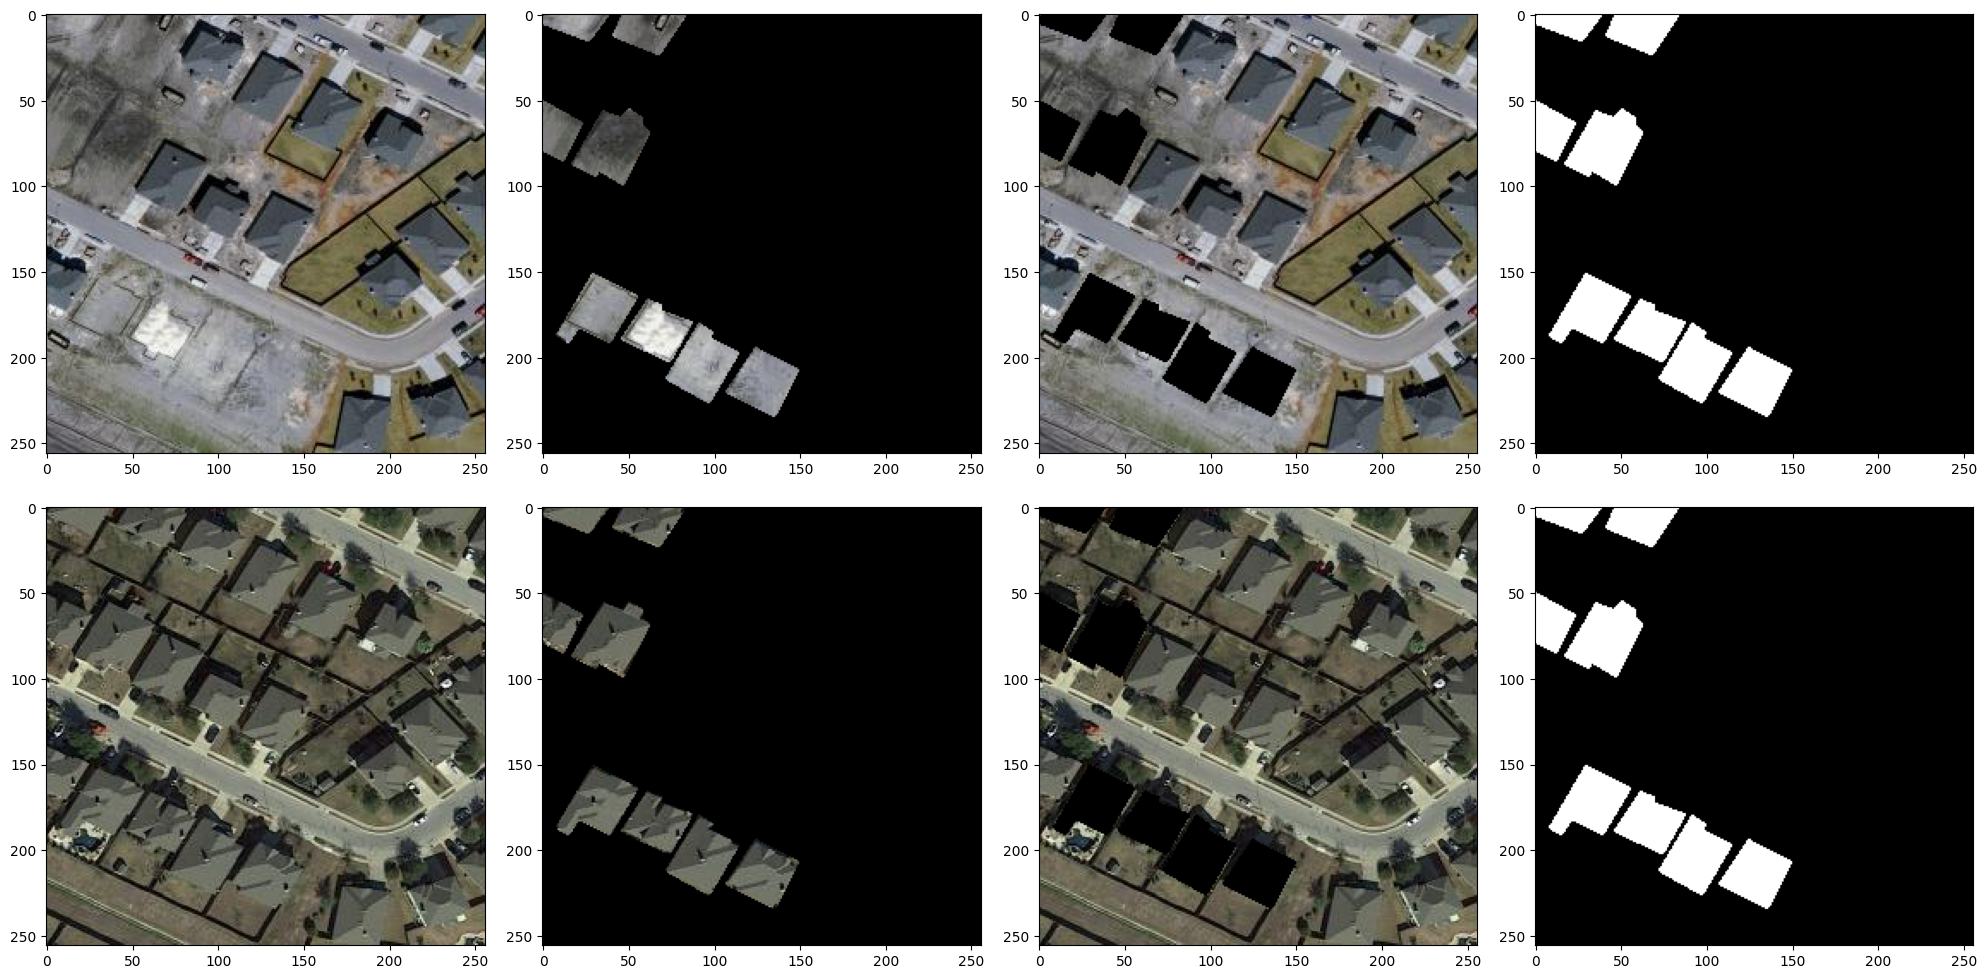

In [51]:
import torch
from encoder import Encoder
from distance import scalar_dist
import pickle
import os
from dataloader import val_dataset, tensor_to_image



def split_image_label (imgA :torch.Tensor, label :torch.Tensor):
    """
    Input: 
        imgA  -> torch.Tensor , 3x256x256\n
        label -> torch.Tensor , 1x256x256
    Output:
        img_1 -> split image where change=1 in label , 3x256x256
        img_2 -> split image where change=0 in label , 3x256x256
    """
    img_1 = imgA.detach().clone()
    img_2 = imgA.detach().clone()

    img_1[0] = torch.where(label[0] == 1, img_1[0], 0.0)
    img_1[1] = torch.where(label[0] == 1, img_1[1], 0.0)
    img_1[2] = torch.where(label[0] == 1, img_1[2], 0.0)

    img_2[0] = torch.where(label[0] != 1, img_2[0], 0.0)
    img_2[1] = torch.where(label[0] != 1, img_2[1], 0.0)
    img_2[2] = torch.where(label[0] != 1, img_2[2], 0.0)

    return img_1, img_2

# Loop over all the datapoints in the validation dataset
i = np.random.randint(0, len(val_dataset)-1)
sample = val_dataset[i]
imgA = sample["img_A"]
imgB = sample["img_B"]
label = sample["label"]

# Encodings for blue and yellow data
imgA_1, imgA_2 = split_image_label(imgA, label)
imgB_1, imgB_2 = split_image_label(imgB, label)


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.tight_layout()

plt.subplot(2, 4, 1)
plt.imshow(tensor_to_image(sample["img_A"]))

plt.subplot(2, 4, 2)
plt.imshow(tensor_to_image(imgA_1))

plt.subplot(2, 4, 3)
plt.imshow(tensor_to_image(imgA_2))

plt.subplot(2, 4, 4)
plt.imshow(tensor_to_image(sample["label"]), cmap="gray")    


plt.subplot(2, 4, 5)
plt.imshow(tensor_to_image(sample["img_B"]))

plt.subplot(2, 4, 6)
plt.imshow(tensor_to_image(imgB_1))

plt.subplot(2, 4, 7)
plt.imshow(tensor_to_image(imgB_2))

plt.subplot(2, 4, 8)
plt.imshow(tensor_to_image(sample["label"]), cmap="gray")    
